In [1]:
import pandas as pd # to load and manipulate data and for One-Hot Encoding
import numpy as np # to calculate the mean and standard deviation
import matplotlib.pyplot as plt # to draw graphs
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay # to draw a confusion matrix
import seaborn as sns

%matplotlib inline

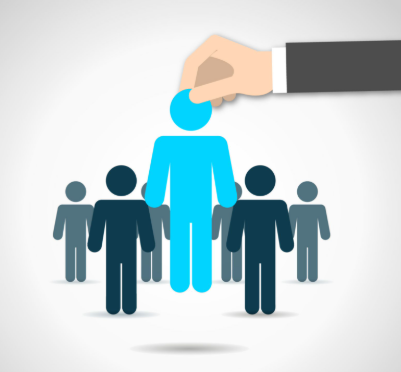




ABOUT THE DATA:
https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset

This dataset contains information about the students academic and training and placement status.


* `CGPA` - It is the overall grades achieved by the student.

* `Internships` - It tells the number of internships a student has done.

* `Projects` - Number of projects a student has done.

* `Workshops/Certifications` - As there are multiple courses available online
student opt for them to upskill themselves.

* `ApptitudeTestScore` - Aptitude test are generally a part of the recruitment process to understand the Quant and logical thinking of the student.

* `SoftSkillrating` - Communication is a key role that plays in the placement or in any aspect of the life.

* `ExtraCurricularActivities `- This helps provide and insight about the personality of an individual regarding how much he is active other than the academic.

* `PlacementTraining` - It is provided to students in college to ace the placement process.

* `SSC and HSC` - Senior Secondary and Higher Secondary Marks.

* ` PlacementStatus `- This is our target column with two classes placed and not placed.

# **Importing the data and performing EDA**

In [53]:
df = pd.read_csv('/content/placementdata.csv')
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


<Axes: xlabel='PlacementStatus', ylabel='count'>

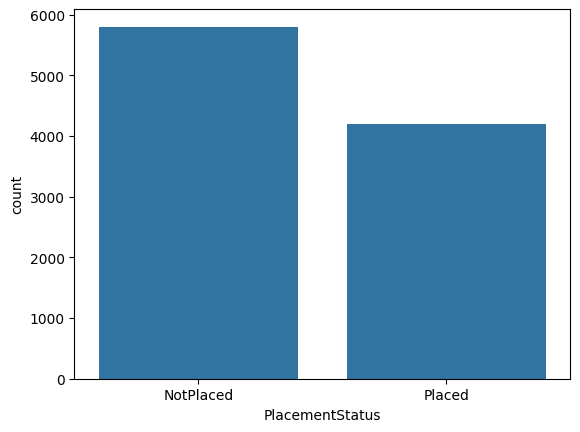

In [54]:
sns.countplot(x='PlacementStatus',data=df)

Most of the students are not placed, that's pretty bad


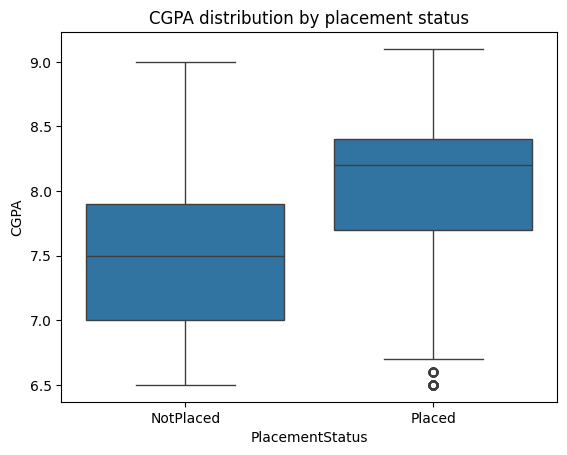

In [55]:
sns.boxplot(x='PlacementStatus', y='CGPA', data=df)
plt.title('CGPA distribution by placement status')
plt.show()

Most of the students with median CGPA between **8.0-8.5** are placed and students with median CGPA of around **7.5** CGPA are not placed, Clearly there are outliers for the students who were Placed , though they had a CPI of **~6.5**

<Axes: xlabel='PlacementTraining', ylabel='PlacementStatus'>

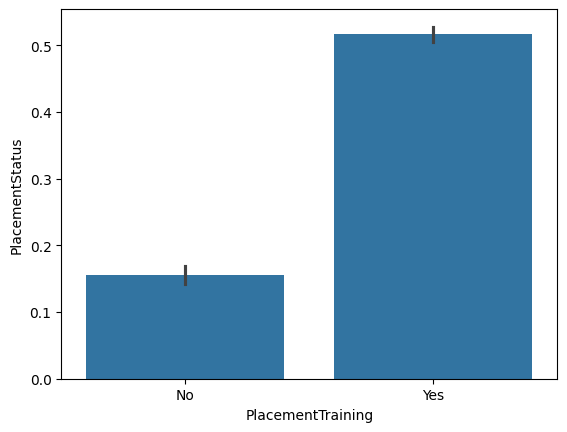

In [40]:
sns.barplot(x='PlacementTraining',y='PlacementStatus',data=df)

There are around **10-20%** chances of getting placement without placement training and **~50%** chances of getting placement after the placement training


<Axes: xlabel='HSC_Marks', ylabel='SSC_Marks'>

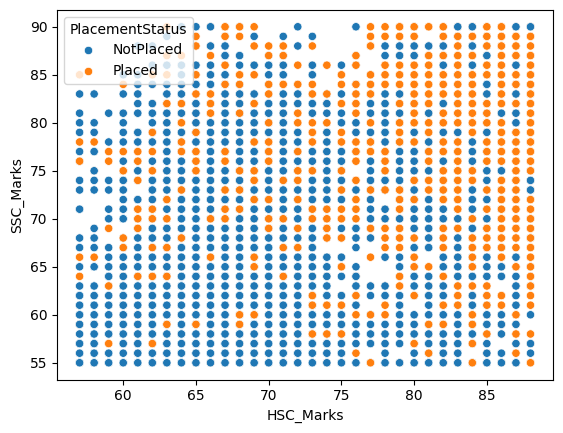

In [57]:
sns.scatterplot(data=df,x='HSC_Marks',y='SSC_Marks',hue='PlacementStatus')

This ScatterPlot also shows that most of the people who got placed had a good score in their Higher Secondary and Senior Secondary School, maybe they have learnt some good skills, especially in Higher Secondary School

In [6]:
#Dropping columns which are not needed
df.drop(['StudentID'],axis='columns',inplace=True)

In [7]:
df.isnull().sum()

,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0
HSC_Marks,0


Since the data has no null values we are good to go


In [8]:
df.nunique()

,0
CGPA,27
Internships,3
Projects,4
Workshops/Certifications,4
AptitudeTestScore,31
SoftSkillsRating,19
ExtracurricularActivities,2
PlacementTraining,2
SSC_Marks,36
HSC_Marks,32


Applying label encoding





In [9]:
df.head()
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['PlacementStatus'] = label_encoder.fit_transform(df['PlacementStatus'])

df.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,No,No,61,79,0
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82,1
2,7.3,1,2,2,82,4.8,Yes,No,79,80,0
3,7.5,1,1,2,85,4.4,Yes,Yes,81,80,1
4,8.3,1,2,2,86,4.5,Yes,Yes,74,88,1


Here Internships and Projects are numerical columns and Placement Training and ExtracurricularActivities and PlacementStatus are categorical columns

In [10]:

X = df.drop(['PlacementStatus'],inplace=False,axis=1)
y = df['PlacementStatus']
X_encoded = pd.get_dummies(X,columns=['ExtracurricularActivities','PlacementTraining'],dtype=int)
X_encoded.head()


,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,ExtracurricularActivities_No,ExtracurricularActivities_Yes,PlacementTraining_No,PlacementTraining_Yes
0,7.5,1,1,1,65,4.4,61,79,1,0,1,0
1,8.9,0,3,2,90,4.0,78,82,0,1,0,1
2,7.3,1,2,2,82,4.8,79,80,0,1,1,0
3,7.5,1,1,2,85,4.4,81,80,0,1,0,1
4,8.3,1,2,2,86,4.5,74,88,0,1,0,1


Placement Status is being taken as the target label. Now we proceed with train test and split



In [11]:
#Performing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)


# **Implementing Decision Trees and Random Forests**


In [12]:
clf_dt = DecisionTreeClassifier(random_state=42,max_depth=10) #Since the training dataset is large we set max_depth=10
clf_dt = clf_dt.fit(X_train,y_train)

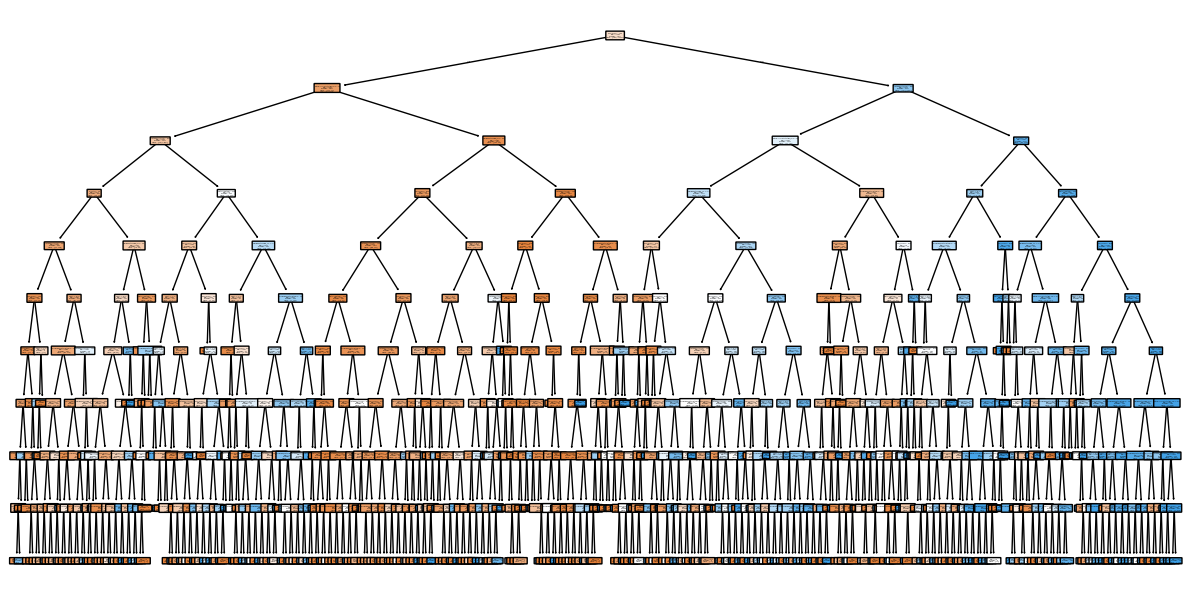

In [13]:
#Plotting the tree

plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,filled=True,rounded=True,class_names=["Not placed","placed"],feature_names=X_encoded.columns);

The tree is huge as we didn't perform pruning yet, also the tree looks overfit

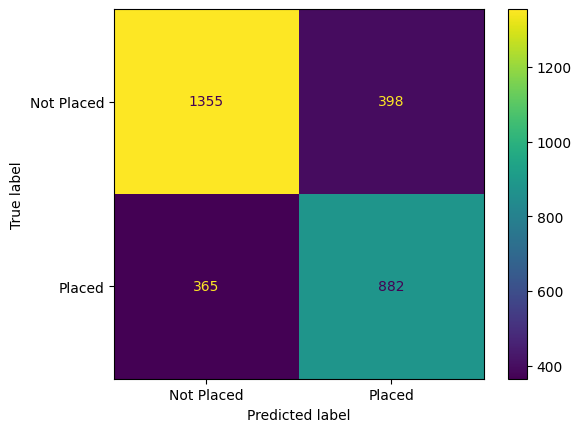

In [14]:
#Plotting the confusion matrix
ConfusionMatrixDisplay.from_estimator(clf_dt, X_test, y_test, display_labels=["Not Placed","Placed"])

Clearly we can see that out of **1355  + 398 = 167** people **1355** people didnt get placement, thus **77%** of the data points were correctly classified and people who were placed were **365 + 882 = 1247** and **70%** data was correctly classified , now we will try to implement cost complexity pruning to prevent overfitting of data and improve the accuracy


**Applying Cost complexity pruning and cross validation**

<Axes: xlabel='alpha'>

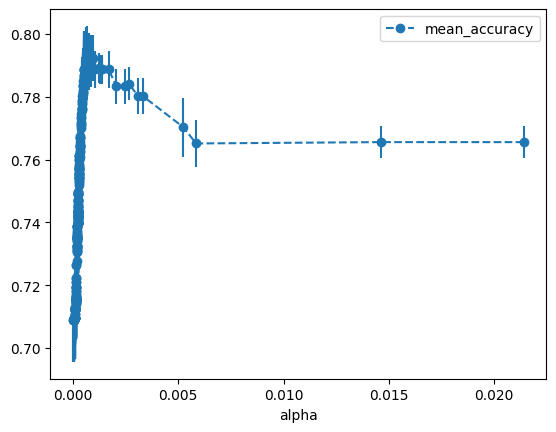

In [15]:
#Choosing an Optimal value of alpha
path = clf_dt.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1] #excluding the maximum value
alpha_val=[]
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt,X_train,y_train,cv=5)
    alpha_val.append([ccp_alpha,np.mean(scores),np.std(scores)])
alpha_r = pd.DataFrame(alpha_val,columns=['alpha','mean_accuracy','std'])
alpha_r.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')


In [16]:
max_mean_accuracy = max(alpha_val, key=lambda item: item[1])
print(f"The maximum mean accuracy is: {max_mean_accuracy[1]}")
print(f"The corresponding alpha value is: {max_mean_accuracy[0]}")
alphamin=0.0008634443332450996

The maximum mean accuracy is: 0.7924285714285715
The corresponding alpha value is: 0.0008634443332450996


Now we can prune the Classification tree with the alpha value

In [17]:
clf_dt_pruned  = DecisionTreeClassifier(random_state=42,ccp_alpha=alphamin)
clf_dt_pruned.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0008634443332450996, random_state=42)

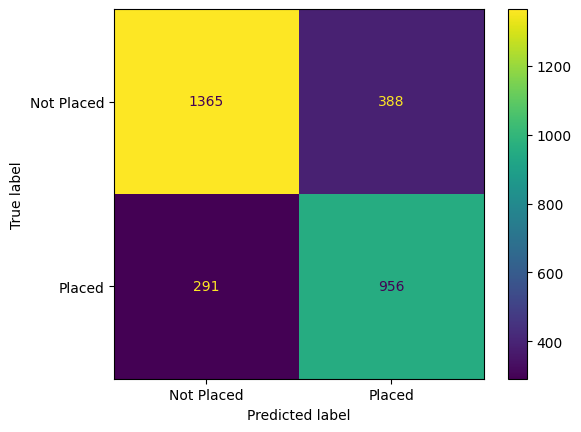

In [18]:
ConfusionMatrixDisplay.from_estimator(clf_dt_pruned,X_test,y_test,display_labels=["Not Placed","Placed"])

Thus we got an improvement in the classification this time out of **1365+388=1753** here **1365(77.8%)** values are correctly classified as not placed and out of **291+956=1247** here **956(76.7%)** values are correctly classified as placed

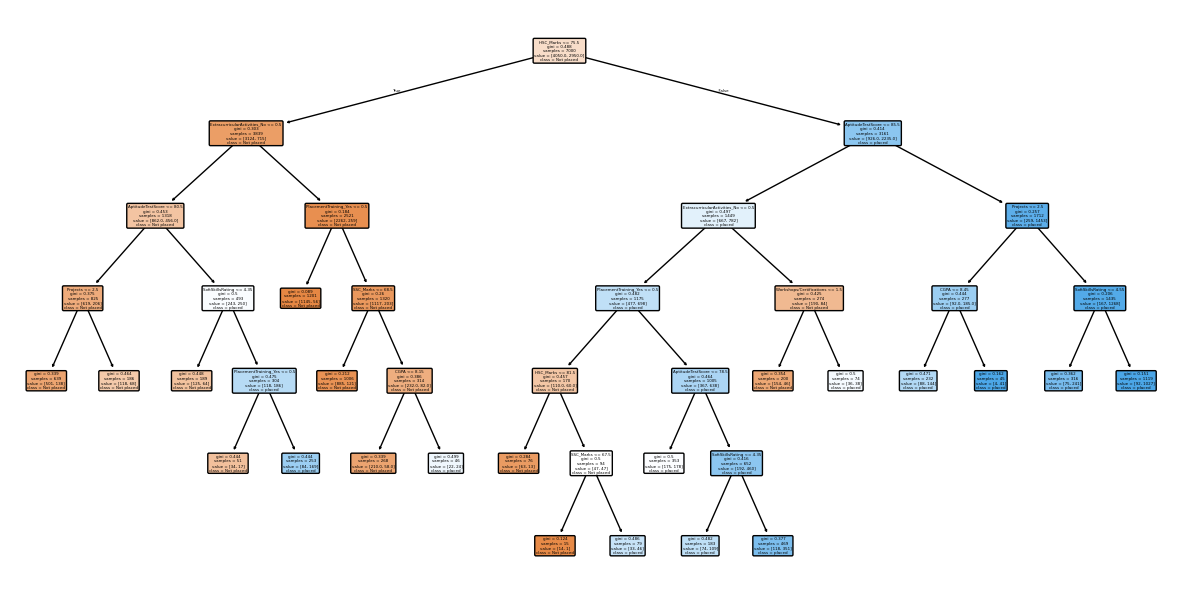

In [19]:

plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=["Not placed","placed"],feature_names=X_encoded.columns);

This is the final pruned tree

**Implementing Random forests**

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=10)
model.fit(X_train,y_train)


RandomForestClassifier(max_depth=10)

In [21]:
model.score(X_test,y_test)

0.7866666666666666

**Randomized Search CV and GridSearchCV hyperparameter tuning**

1. Randomized Search cross validation

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best paramters: {'n_estimators': 433, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 33, 'bootstrap': True})
0.784 The accuracy of model


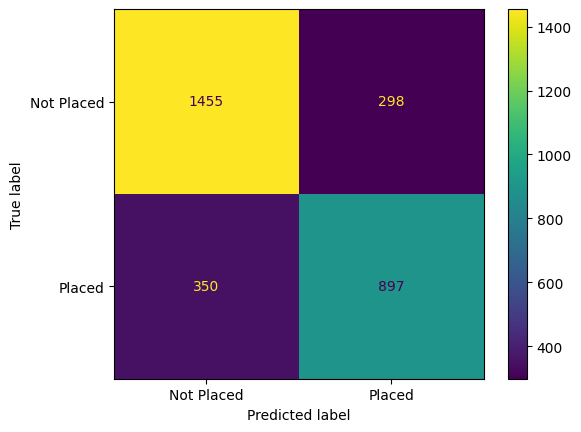

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=100,stop=600,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,80,num=10)]
max_depth.append(None)
min_samples_split=[int(x) for x in np.linspace(2,10,num=1)]
min_samples_leaf=[int(x) for x in np.linspace(2,10,num=1)]
bootstrap = [True,False]

random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'bootstrap' : bootstrap
}
rf_clf = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(
    estimator = rf_clf,
    scoring = 'accuracy',
    param_distributions = random_grid,
    n_iter = 25,
    cv = 5,
    verbose = 1,
    random_state=42,
    n_jobs=-1
)
rf_cv.fit(X_train,y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print(rf_clf.score(X_test,y_test),"The accuracy of model")
ConfusionMatrixDisplay.from_estimator(rf_clf,X_test,y_test,display_labels=["Not Placed","Placed"])

2. Grid Search cross validation

Fitting 5 folds for each of 440 candidates, totalling 2200 fits
Best paramters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 155})
0.7826666666666666


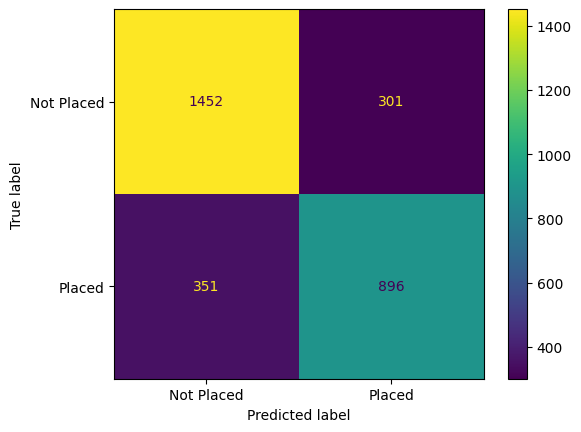

In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators = [int(x) for x in np.linspace(start=100,stop=600,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,80,num=10)]
max_depth.append(None)
min_samples_split=[int(x) for x in np.linspace(2,10,num=1)]
min_samples_leaf=[int(x) for x in np.linspace(2,10,num=1)]
bootstrap = [True,False]

random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'bootstrap' : bootstrap
}
rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(
    estimator = rf_clf,
    scoring = 'f1',
    param_grid = random_grid,
    cv = 5,
    verbose = 1,
    n_jobs=-1
)
rf_cv.fit(X_train,y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print(rf_clf.score(X_test,y_test))
ConfusionMatrixDisplay.from_estimator(rf_clf,X_test,y_test,display_labels=["Not Placed","Placed"])

Here GridSearch CV didnt evaluate the  parameters much better , also we got almost same accuraccy as the RandomSearch CV


# **Implementing XGBoost(with HyperParameter tuning) and Adaboost**

**1.XGBoost**

In [24]:
import xgboost as xgb
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',seed=42,eval_metric='aucpr')
clf_xgb.fit(X_train,y_train,verbose=True,eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.77905
[1]	validation_0-aucpr:0.79854
[2]	validation_0-aucpr:0.80077
[3]	validation_0-aucpr:0.81023
[4]	validation_0-aucpr:0.81463
[5]	validation_0-aucpr:0.81908
[6]	validation_0-aucpr:0.81830
[7]	validation_0-aucpr:0.81637
[8]	validation_0-aucpr:0.81721
[9]	validation_0-aucpr:0.81783
[10]	validation_0-aucpr:0.81805
[11]	validation_0-aucpr:0.81875
[12]	validation_0-aucpr:0.81834
[13]	validation_0-aucpr:0.81800
[14]	validation_0-aucpr:0.81748
[15]	validation_0-aucpr:0.81706
[16]	validation_0-aucpr:0.81647
[17]	validation_0-aucpr:0.81640
[18]	validation_0-aucpr:0.81583
[19]	validation_0-aucpr:0.81552
[20]	validation_0-aucpr:0.81384
[21]	validation_0-aucpr:0.81330
[22]	validation_0-aucpr:0.81367
[23]	validation_0-aucpr:0.81382
[24]	validation_0-aucpr:0.81389
[25]	validation_0-aucpr:0.81368
[26]	validation_0-aucpr:0.81374
[27]	validation_0-aucpr:0.81434
[28]	validation_0-aucpr:0.81444
[29]	validation_0-aucpr:0.81319
[30]	validation_0-aucpr:0.81300
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

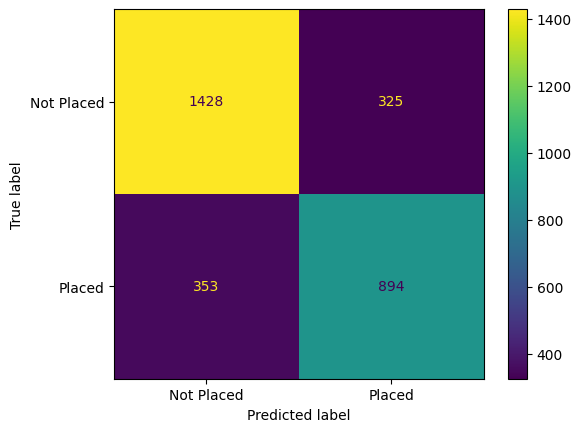

In [25]:
ConfusionMatrixDisplay.from_estimator(clf_xgb,X_test,y_test,display_labels=["Not Placed","Placed"])

In the Confusion Matrix we see that **1753** people were not placed and **1247** people were placed  thus **81%** of the Students were correctly classified as **Not Placed** and **71%** of Students were correctly classified as **Placed**, There has been an increase in the accuracy of students **Not Placed**  after using the XGBoost as compared to the Cost Complexity Pruning, and decrease in the accuracy of Students **Placed** after using XGBoost as compared to Cost Complexity Pruning


**Hyperparameter Tuning**




I will be only using GridSearchCV here

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth':[3,6,8],
    'gamma' : [1000,500,100,50,20],
    'reg_lamda' : [10,20,100],
}
op_xgb = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',seed=42,subsample=0.9,colsample_bytree=0.5),
                      param_grid = param_grid,
                     scoring='roc_auc',
                      verbose=0,
                      n_jobs=10,
                      cv=3)
op_xgb.fit(X_train,y_train)
print(op_xgb.best_params_)


{'gamma': 20, 'max_depth': 6, 'reg_lamda': 10}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:11:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "reg_lamda" } are not used.

  warnings.warn(smsg, UserWarning)


In [37]:
#Evaluating on these parameters
xgb_optim = xgb.XGBClassifier(seed=42,objective='binary:logistic',gamma = 20,max_depth=6,reg_lambda=10,subsample=0.9,colsample_bytree=0.5,eval_metric='aucpr')
xgb_optim.fit(X_train,y_train,verbose=1,eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.75752
[1]	validation_0-aucpr:0.80158
[2]	validation_0-aucpr:0.80667
[3]	validation_0-aucpr:0.80294
[4]	validation_0-aucpr:0.80937
[5]	validation_0-aucpr:0.81154
[6]	validation_0-aucpr:0.81305
[7]	validation_0-aucpr:0.81387
[8]	validation_0-aucpr:0.81589
[9]	validation_0-aucpr:0.81926
[10]	validation_0-aucpr:0.81906
[11]	validation_0-aucpr:0.81966
[12]	validation_0-aucpr:0.81977
[13]	validation_0-aucpr:0.82001
[14]	validation_0-aucpr:0.82001
[15]	validation_0-aucpr:0.82001
[16]	validation_0-aucpr:0.82001
[17]	validation_0-aucpr:0.82001
[18]	validation_0-aucpr:0.82001
[19]	validation_0-aucpr:0.82001
[20]	validation_0-aucpr:0.82001
[21]	validation_0-aucpr:0.82001
[22]	validation_0-aucpr:0.82001
[23]	validation_0-aucpr:0.81966
[24]	validation_0-aucpr:0.81966
[25]	validation_0-aucpr:0.81966
[26]	validation_0-aucpr:0.81966
[27]	validation_0-aucpr:0.81966
[28]	validation_0-aucpr:0.81966
[29]	validation_0-aucpr:0.81966
[30]	validation_0-aucpr:0.81966
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=20, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

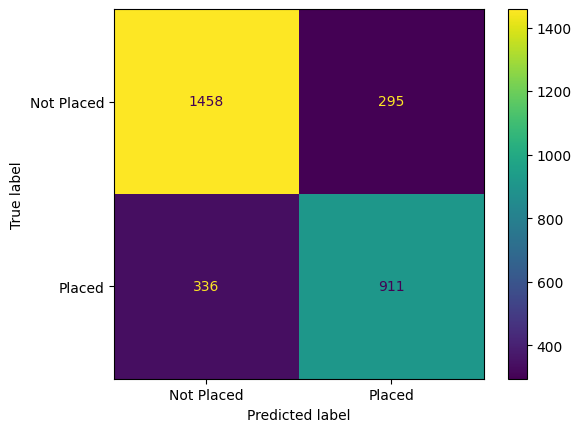

In [38]:
ConfusionMatrixDisplay.from_estimator(xgb_optim,X_test,y_test,display_labels=["Not Placed","Placed"])

The model has done better than before , to save time I didnt choose much parameters.


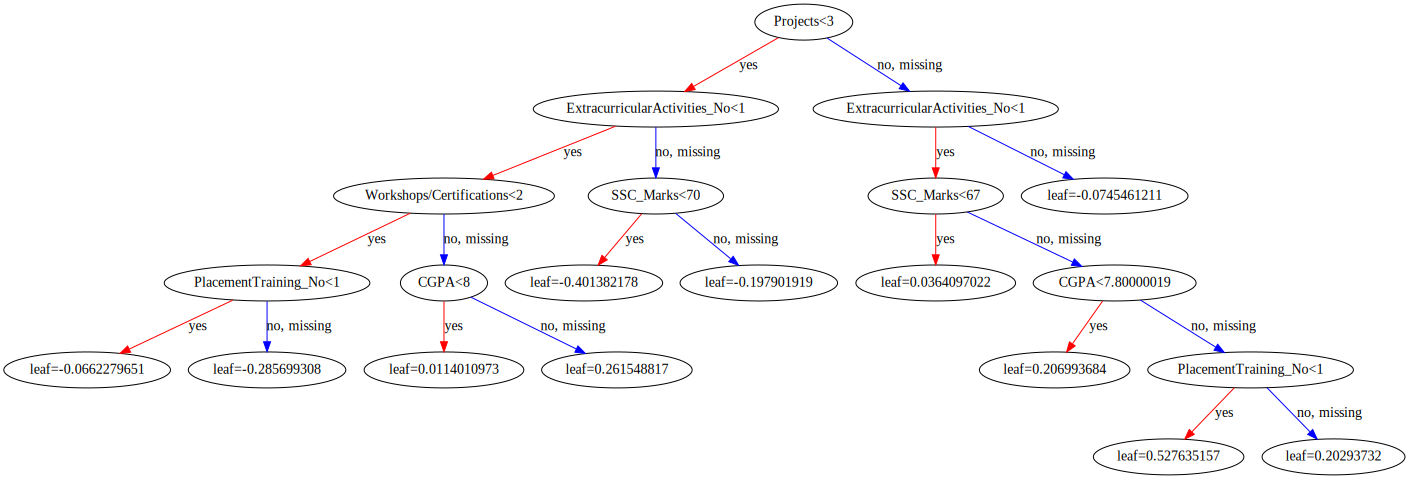

In [39]:
xgb.to_graphviz(xgb_optim,size="10,10")

This is our final tree optimized with Xgboost and Hyperparameter tuning using GridSearchCV

**2.AdaBoost Implementation**


In [41]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
model1 = abc.fit(X_train, y_train)
y_pred = model1.predict(X_test)


In [42]:
from sklearn.metrics import accuracy_score

print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.7873333333333333


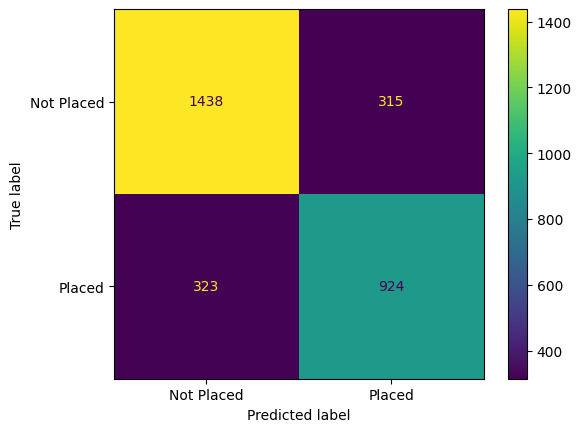

In [43]:
ConfusionMatrixDisplay.from_estimator(model1,X_test,y_test,display_labels=["Not Placed","Placed"])

**AdaBoost** did a better job in classifying the data as compared to **XGBoost without optimization**, As XGBoost starts with an initial prediction then improves it by updating values by multiplying with a learning rate and adding them, whereas AdaBoost assigns weights to the rows for prediction and updates the weights later on the based of their amount of say

# **LightGBM Classifier**

In [45]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(max_depth=7,boosting_type="goss")
clf.fit(X_train, y_train)


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 2950, number of negative: 4050
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 169
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 12
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.421429 -> initscore=-0.316912
[LightGBM] [Info] Start training from score -

LGBMClassifier(boosting_type='goss', max_depth=7)

In [46]:
y_pred = clf.predict(X_test)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


In [49]:
accuracy_score(y_test, y_pred)

0.7773333333333333

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


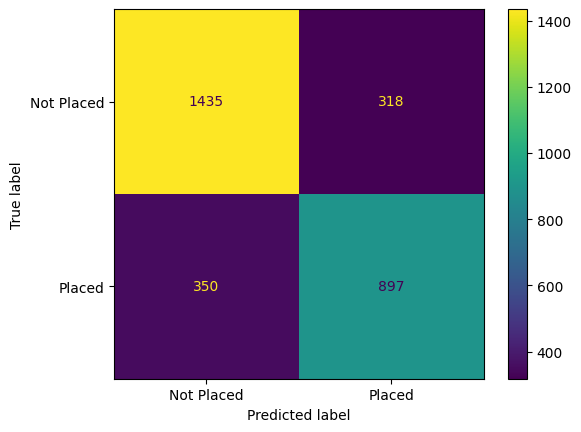

In [51]:
ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test,display_labels=["Not Placed","Placed"])

LightGBM also did a good job in classifying the data, as the accuracies are somewhat closer to XGBoost, for more better performance Hyperparameter tuning could be useful

# **Final comparision of Boosting models with ROC-AUC Curve**

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


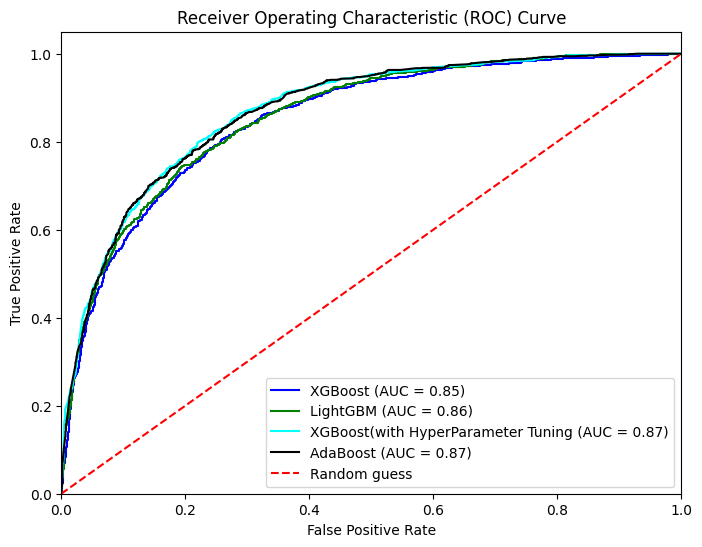

In [62]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y1_pred_proba = clf.predict_proba(X_test)[:, 1]
y2_pred_proba = xgb_optim.predict_proba(X_test)[:, 1]
y3_pred_proba = model1.predict_proba(X_test)[:, 1]
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y1_pred_proba)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y2_pred_proba)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y3_pred_proba)
# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot(fpr1, tpr1, color='green', label=f'LightGBM (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='cyan', label=f'XGBoost(with HyperParameter Tuning (AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, color='k', label=f'AdaBoost (AUC = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Thus All the boosting models performed relatively better for the dataset, wheres the XGBoost(with hyperparameter tuning using GridSearchCV) and AdaBoost Performed nearly same for the given dataset